# Integrated Project 1


Working at a online store Ice, that sells video games all over the world. To better identify patterns that help determine whether a game succeeds or not utilize user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. This will allow to spot potential big winners and plan advertising campaigns in certain regional areas. Reimagining it is 2016, use the data given to get an idea on how toplan a campaign for 2017.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
# Import Dataset
df=pd.read_csv('/datasets/games.csv')

In [3]:
# Look at general information of the dataset, null lines
df.info()
# Look at first few lines and how columns are laid out
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Replacing column names to lower case
df.rename(columns=str.lower, inplace=True)
print(df.columns)

Replace missing values, will start with "year_of_release" and will drop the null values as well as convert the data type to help with analysis later on.

In [4]:
# Rename columns so they are all lowercase
df.rename(columns=str.lower, inplace=True)
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
# Drop the null values
df.dropna(subset=['year_of_release'], inplace=True)

# Convert the column to date-time data type
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release'] = df['year_of_release'].dt.year.astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


In [6]:
# Not too many missing values with name and genre, opt to drop the two missing values seen, to sustain clear dataset.
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['genre'], inplace=True)

display(df.sample(5))
print(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4585,Trials Fusion,PS4,2014,Racing,0.13,0.22,0.01,0.07,79.0,7.2,E10+
6113,Divinity: Original Sin,PS4,2015,Role-Playing,0.10,0.12,0.02,0.04,NaN,NaN,NaN
3433,Q*bert,2600,1982,Puzzle,0.55,0.03,0.00,0.01,NaN,NaN,NaN
2800,Croc 2,PS,1999,Platform,0.41,0.28,0.00,0.05,NaN,NaN,NaN
6232,Avatar: The Last Airbender,Wii,2006,Adventure,0.23,0.02,0.00,0.02,56.0,5.8,E10+


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


Looking at the 'critic_score' column there are a very significant amount of missing values to clear up. To insert a value as a placeholder in this column, opt to putting "0" as the placeholder for those missing values. My hope is that this helps with clarity and cohesion of the dataset.

In [7]:
# Replace missing 'critic_score' values with the average critic score rating of games within the data frame
df['critic_score'].fillna(0, inplace=True)

display(df.sample(5))
print(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9929,The Clique: Diss and Make Up,DS,2009,Adventure,0.11,0.00,0.00,0.01,0.0,tbd,E10+
7930,Penguin no Mondai X: Tenkuu no 7 Senshi,DS,2009,Action,0.00,0.00,0.19,0.00,0.0,NaN,NaN
10559,Hakuouki Portable,PSP,2009,Adventure,0.00,0.00,0.10,0.00,0.0,NaN,NaN
2509,Need for Speed: Hot Pursuit 2,XB,2002,Racing,0.68,0.11,0.00,0.03,75.0,6.4,E
7141,Conflict: Vietnam,XB,2004,Shooter,0.17,0.05,0.00,0.01,60.0,7.3,M


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


In the "user_score" column there were a lot of "tbd" values, along with the null values seen, which would throw off the dataset. Will opt to drop both "tbd" and the null values for cohesion. Will also change the data type. This will hopefully provide better accuracy of analysis.

In [8]:
# Replace missing and unacceptable 'user_score' values with the average user score rating of games within the data frame
df['user_score'] = df['user_score'].replace('tbd', 0)
df['user_score'].fillna(0, inplace=True)
df['user_score'] = df['user_score'].astype(float)

display(df.sample(5))
print(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9106,Dead to Rights,GC,2002,Shooter,0.11,0.03,0.00,0.00,77.0,8.7,M
16430,Shinseiki Evangelion: Koutetsu no Girlfriend T...,PSP,2009,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
8522,Crash Tag Team Racing,GC,2005,Racing,0.12,0.03,0.00,0.00,66.0,7.3,E10+
10894,Medal of Honor: Vanguard,Wii,2007,Shooter,0.06,0.03,0.00,0.01,56.0,7.0,T
6731,SBK Superbike World Championship,PS3,2008,Racing,0.12,0.11,0.00,0.02,59.0,6.1,E10+


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


In [9]:
# Noticed that the "critic_score" and the "user_score" numbers looked different and that may hurt if you wanted to compare the two later on. Will multiply the " user_score" by ten to get results that can be comparible to each other.
df['user_score'] = df['user_score'] * 10
display(df.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2158,World Championship Poker,PS2,2004,Misc,0.80,0.03,0.00,0.13,60.0,77.0,E
7412,SBK Superbike World Championship,X360,2008,Racing,0.06,0.14,0.00,0.01,63.0,80.0,E10+
10320,Rengoku: The Tower of Purgatory,PSP,2005,Action,0.10,0.00,0.00,0.01,43.0,56.0,M
5151,The House of the Dead: Overkill - Extended Cut,PS3,2011,Shooter,0.15,0.16,0.00,0.06,0.0,0.0,NaN
5355,Pirates of the Caribbean: At World's End,DS,2007,Action,0.30,0.01,0.01,0.03,66.0,0.0,E10+


Moving onto the "rating" column, there are close to half the entries that are missing. Will need to input placeholder to help clean up dataset. Will inject "U" for unknown as the placeholder.

In [10]:
# Replace missing 'rating' values with placeholder 'U'
df['rating'].fillna('U', inplace=True)

display(df.sample(5))
print(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
664,Dead Island,X360,2011,Action,1.48,0.69,0.00,0.20,71.0,69.0,M
8058,Brunswick Pro Bowling,PS3,2010,Sports,0.10,0.05,0.00,0.02,47.0,0.0,E
12048,BlazBlue: Chrono Phantasma,PSV,2014,Fighting,0.03,0.00,0.03,0.01,0.0,78.0,T
2189,Midway Presents Arcade's Greatest Hits: The At...,PS,1996,Misc,0.52,0.36,0.00,0.06,0.0,0.0,U
11196,Henry Hatsworth in the Puzzling Adventure,DS,2009,Puzzle,0.08,0.00,0.00,0.01,82.0,80.0,E


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


The dataset is now cleaned up with null values removed. To help expand on the data we have, want to make another column to combine all the sales from the four columns (na_sales, eu_sales, jp_sales, and other_sales) to get a totoal amount of sales for each title.

In [11]:
# Calculate the total number of sales for each game
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

display(df.sample(5))
print(df.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3894,DC Universe Online,PS3,2011,Role-Playing,0.35,0.11,0.00,0.06,67.0,74.0,T,0.52
2236,The LEGO Movie Videogame,PS3,2014,Action,0.33,0.43,0.02,0.15,80.0,68.0,E10+,0.93
16470,Super Bubble Pop,XB,2002,Puzzle,0.01,0.00,0.00,0.00,42.0,0.0,E,0.01
12272,NHL Hitz Pro,XB,2003,Sports,0.05,0.01,0.00,0.00,81.0,88.0,E,0.06
5188,Sword Art Online: Lost Song,PSV,2015,Role-Playing,0.06,0.04,0.23,0.03,70.0,71.0,T,0.36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None


Analyze Data

Will examine the number of game releases over the year given. This will help us to narrow the years that may hold more significant data that will be help our focus.

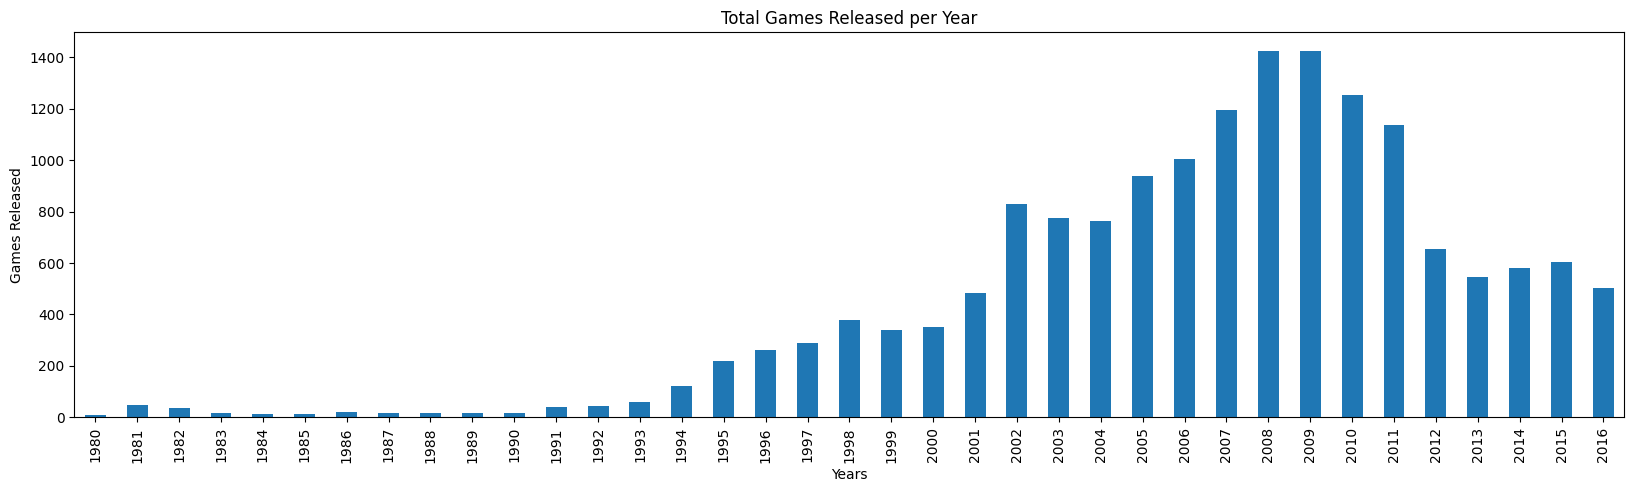

In [12]:
plt.figure(figsize=(20, 5))
df['year_of_release'].value_counts().sort_index().plot(kind='bar', title='Total Games Released per Year', xlabel='Years', ylabel='Games Released')
plt.show()

The above graph shows us a few insights. Years 2008 and 2009 were the peak years with the most game releases. Starting in 2001 we start to see huge jumps in releases in most years with the exception 2003 and 2004 and start to drop in 2010. After 2011 a huge drop is seen in releases.

Making a graph below to see how game sales for each platform

<AxesSubplot:title={'center':'Total Game Sales for Each Platform'}, xlabel='Platforms', ylabel='Total Game Sales (Millions)'>

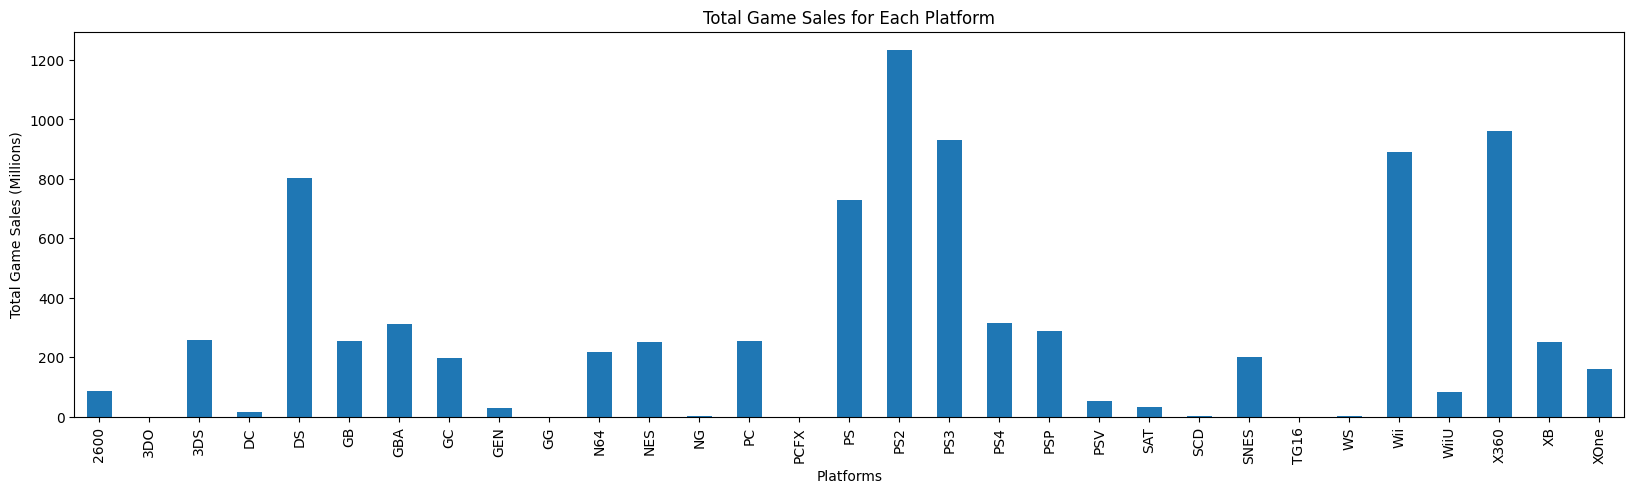

In [13]:
plt.figure(figsize=(20, 5))
df.groupby('platform')['total_sales'].sum().sort_index().plot(kind='bar', title='Total Game Sales for Each Platform', xlabel='Platforms', ylabel='Total Game Sales (Millions)')

Looking at the graph, it looks like PS2, Xbox 360, PS3, Wii, and DS.

Analyze the total annual sales of these top platforms from the year 2000 onward by building a distribution. It seems that after the year 2000 is when we see the biggest changes. Using the top 5 platforms (PS2, Xbox 360, PS3, Wii, and DS) with most game sales will look to make graph to see how these sales look like over the years 2000-2016.

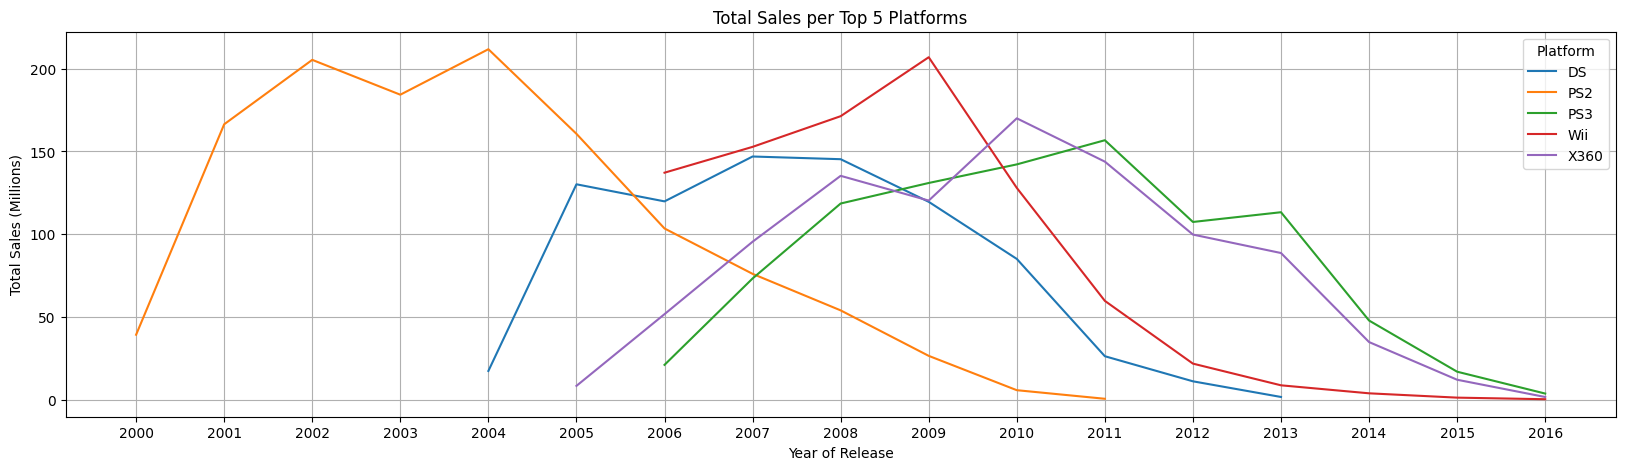

In [14]:
# Group by year_of_release and platform, then sum total sales
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_5_plats = platform_sales.head(5)


# Filter the original DataFrame so that it only contains the top 5 platforms
top_5_games_df = df[df['platform'].isin(top_5_plats.keys()) & (df['year_of_release'] >= 2000)]
platform_sales_df = top_5_games_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()


fig, ax = plt.subplots(figsize=(20, 5))

# Plot each platform's total sales by year
for platform in platform_sales_df.columns:
    ax.plot(platform_sales_df.index, platform_sales_df[platform], label=platform)

plt.title('Total Sales per Top 5 Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform')

# Set x-axis to diaplye years
ax.set_xticks(platform_sales_df.index)
ax.set_xticklabels(platform_sales_df.index)

plt.grid(True)
plt.show()

Analyzing the chart above, we first see that PS2 had the biggest incline and sustainable period of sales. The Wii had a decent increase that peaked in 2009 about where the total sales matched PS2 was but had a steep decline right after.The remaining platforms showed that the trend of sales steadily increasing, reaching peaks around the 3-4 year mark, and then gradually declining.

To help with looking at future projections for 2017 will narrow focus to 2013-2016 to allow four years of data. Earlier years could potentially skew data because of irrelavancy and would not help accuracy for the projections for 2017.

In [15]:
# Filter the data frame to include only relevant data
df = df[(df['year_of_release'] >= 2013)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB
None


Difference in Sales
Will build a box plot for the global sales of all games. Will break it down by platform to explore whether or not the differences in sales significant.

<Figure size 640x480 with 0 Axes>

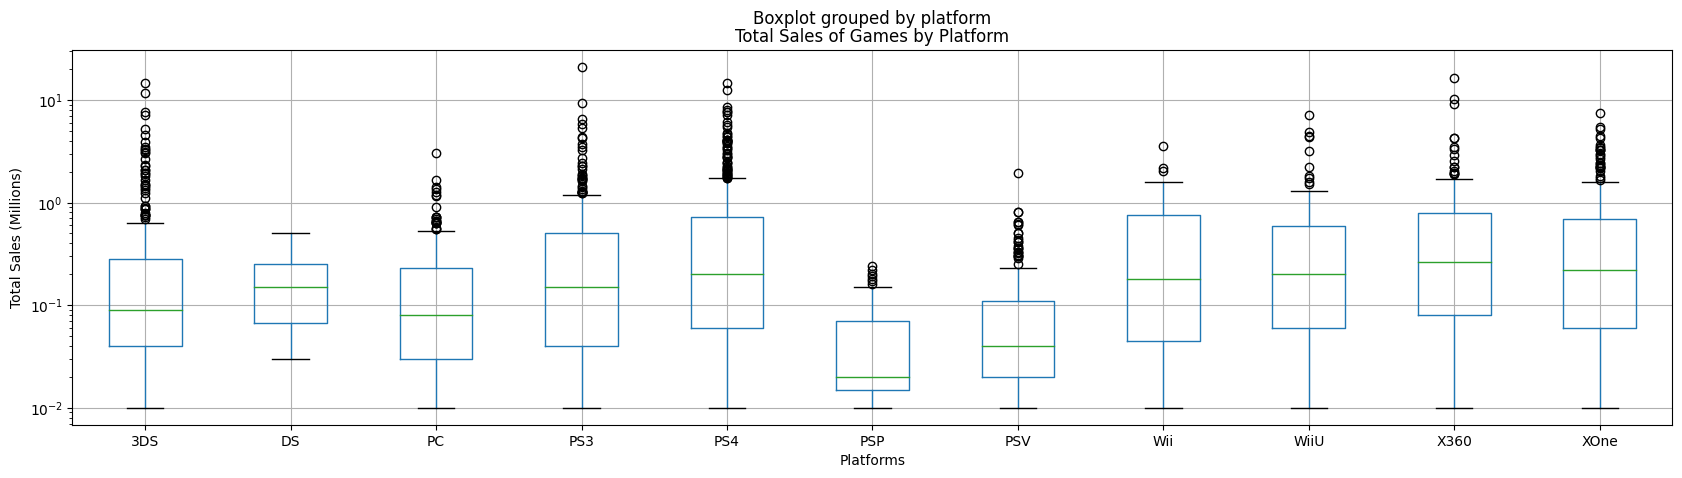

,mean,median,std,var
,total_sales,total_sales,total_sales,total_sales
platform,,,,
3DS,0.472772,0.090,1.381347,1.908119
DS,0.192500,0.150,0.172026,0.029593
PC,0.208624,0.080,0.352304,0.124118
PS3,0.525884,0.150,1.451939,2.108128
PS4,0.801378,0.200,1.609456,2.590350
PSP,0.052239,0.020,0.059768,0.003572
PSV,0.092151,0.040,0.153816,0.023660
Wii,0.593913,0.180,0.915432,0.838016


In [16]:
# Plot box plots for each gaming platform to meaure difference in sales
plt.figure()
df.boxplot(column='total_sales', by='platform', figsize=(20, 5))
plt.title('Total Sales of Games by Platform')
plt.xlabel('Platforms')
plt.ylabel('Total Sales (Millions)')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

# Calculate the mean, median, std dev and variance of the total sales by platform
df.pivot_table(index='platform', values=['total_sales'], aggfunc=['mean', 'median', 'std', 'var'])

The median total sales as seen in the box plot and pivot table above provide a measure of the central tendency and are particularly useful for understanding the distribution of sales data. For instance, while the median total sales for PSP and DS are relatively low at 0.020 million and 0.150 million respectively, platforms like PS4 and X360 show higher median sales figures of 0.200 million and 0.265 million, indicating a more evenly distributed sales pattern.

The mean total sales serve as a measure of average sales volume on each platform, indicating relative popularity or market success. Platforms with higher mean total sales, such as the PS4, signify stronger overall sales performance. Theplatforms with lower mean sales, like PSP or PSV, may have less market share or appeal.

The standard deviation measures the variability or dispersion of total sales around the mean, with higher values suggesting greater fluctuation in sales performance across different games. For instance, the Xbox 360 exhibits the highest standard deviation and variance, implying significant variability in sales figures. Meanwhile, platforms like PS4, Xbox 30, and Wii show relatively high mean total sales, underscoring their significance in the gaming market.

This data aids in understanding sales dynamics and market positioning across gaming platforms, facilitating informed strategic decisions within the industry.

Assess if reviews affect sales:
Let's examine how user and professional reviews influence sales for Xbox 360 games. We will create scatter plots for user scores and critic scores, and calculate the correlation between reviews and sales for each plot. Let's begin with Critic Scores.

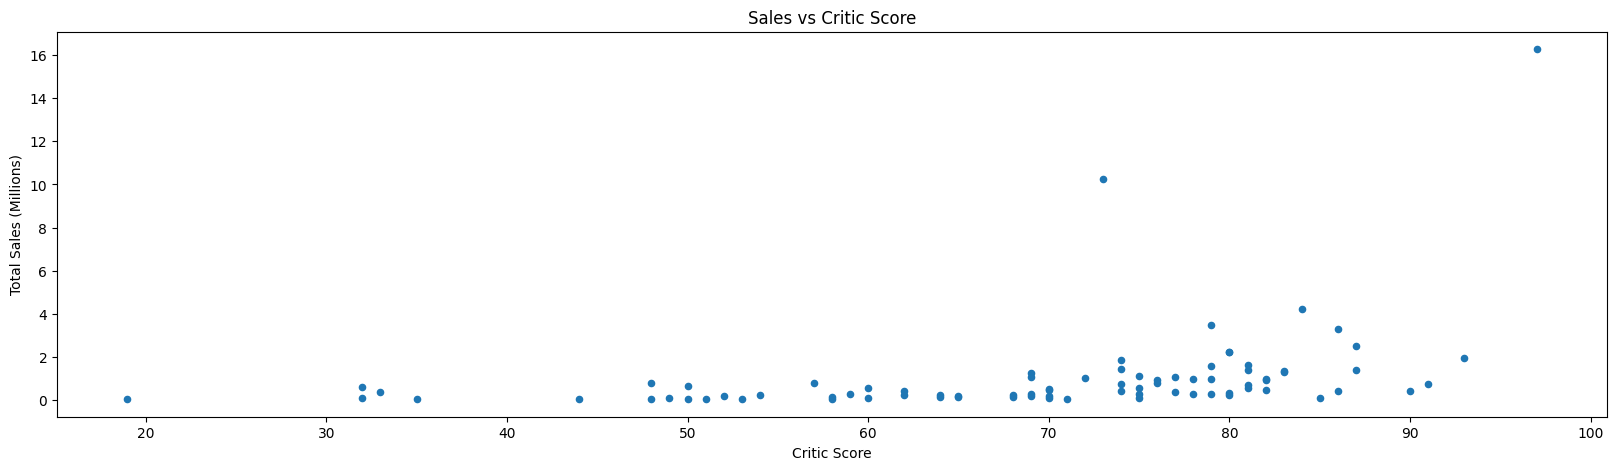

Correlation Coefficent (Sales vs Critic Score): 0.3503445460228664


In [17]:
# Plotting the first scatter plot with 'critic_score' on x-axis and 'total_sales' on y-axis
x360_critic = df[(df['platform'] == 'X360') & (df['critic_score'] != 0)]
fig, ax = plt.subplots(figsize=(20, 5))
x360_critic.plot(x='critic_score', y='total_sales', kind='scatter', title='Sales vs Critic Score', ax=ax)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

print("Correlation Coefficent (Sales vs Critic Score):", x360_critic['critic_score'].corr(x360_critic['total_sales']))

Based on the scatterplot and the correlation coefficient of 0.246, there is not a strong relationship between sales and critic scores. This indicates that positive or negative reviews do not necessarily indicate to higher sales for a game. Will investigate whether this for user reviews as well.

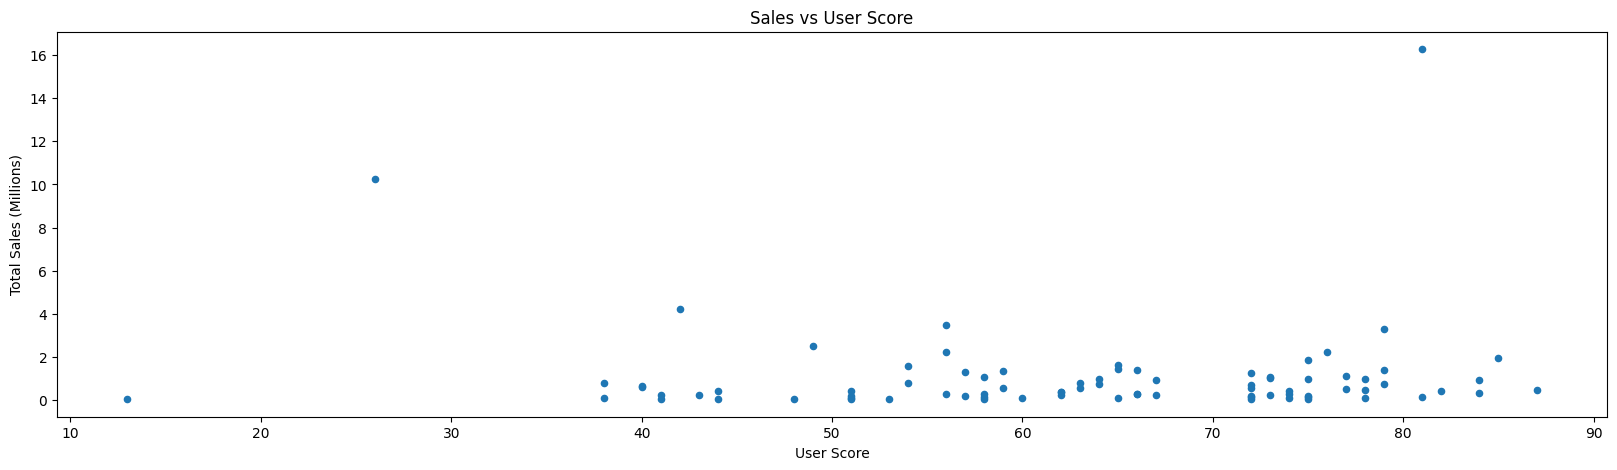

Correlation Coefficent (Sales vs User Score): -0.006238179532306256


In [18]:
# Plotting the second scatter plot with 'user_score' on x-axis and 'total_sales' on y-axis
x360_user = df[(df['platform'] == 'X360') & (df['critic_score'] != 0)]
fig, ax = plt.subplots(figsize=(20, 5))
x360_user.plot(x='user_score', y='total_sales', kind='scatter', title='Sales vs User Score', ax=ax)
plt.xlabel('User Score')
plt.ylabel('Total Sales (Millions)')
plt.show()

print("Correlation Coefficent (Sales vs User Score):", x360_user['user_score'].corr(x360_user['total_sales']))

The data taken from the xbox360 indicates the correlation coefficient being 0.06 would tell me there a weeak correlation between the sales and user reviews. Taking this information would leave me to conclude that user reviews do not have a significant impact on game sales.

Cross-Platform Sales Analysis
NI want to start to make a comparison of game sales across different platforms. First step is to identify the top three games with availability across multiple platforms. By identifying the top three games available on multiple platforms, we can ensure our analysis is based on comprehensive and accurate data, setting a solid foundation for our comparison.

In [19]:
# Get the top 3 games that are availble to the most amount of gaming platforms
game_platform_counts = df.groupby('name')['platform'].nunique().sort_values(ascending=False)
three_games = game_platform_counts.head(3)
print(three_games)

name
LEGO Marvel Super Heroes    9
FIFA 14                     9
LEGO Jurassic World         8
Name: platform, dtype: int64


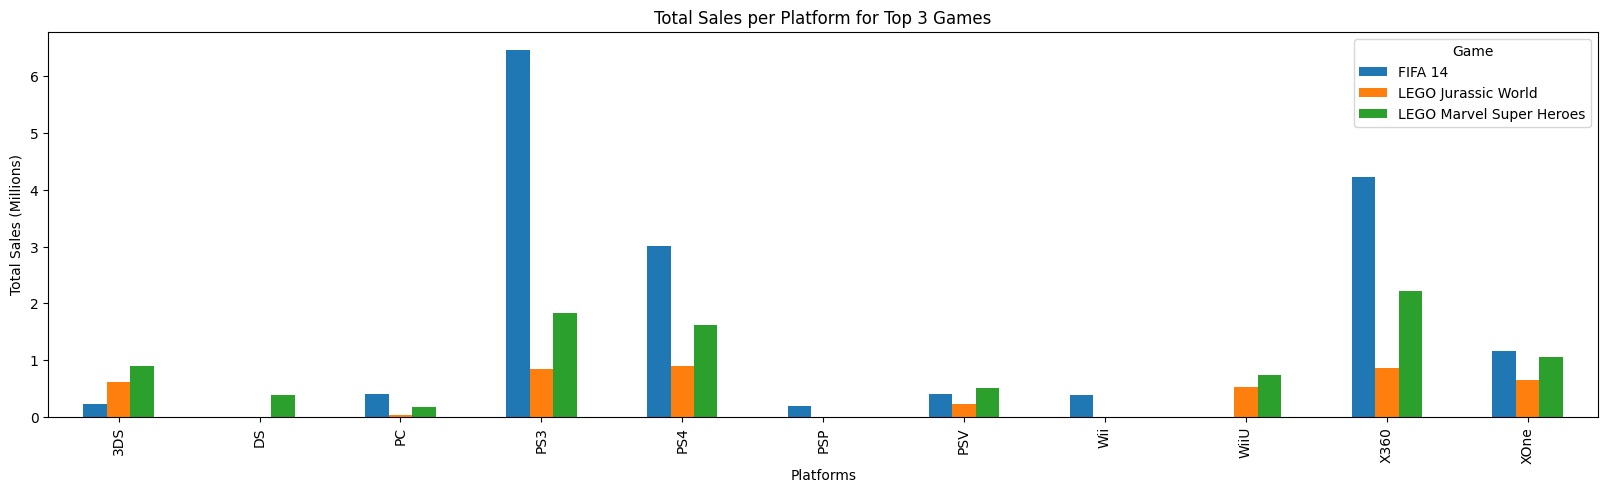

In [20]:
# Filter the original DataFrame so that it only contains our chosen 3 games for the graph
three_plats_games_df = df[df['name'].isin(three_games.keys())]

# Plot
fig, ax = plt.subplots(figsize=(20, 5))
three_plats_games_df.groupby(['platform', 'name'])['total_sales'].sum().unstack().plot(kind='bar', ax=ax)
plt.title('Total Sales per Platform for Top 3 Games')
plt.xlabel('Platforms')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Game')
plt.show()

Looking at the above graph and data acrossmultiple gaming platforms, we can make multiple observations. One of the biggest is seeing how FIFA 14 has a considerable jump on sales acrossPS3, PS4 and X360. It lloks like it is hitting the Nintendo cosoles during a transition period with the Wii gaining the sales and WiiU probably not carrying it. We can see that PS3, PS4 and X360 are probably more used by the community as a whole versus some of the handheld consoles (3DS, DS, PSP) and PC users at this time.This can give insights during this time that could provide market intelligence on what people are wanting to purchase and console preferences in playing the bigger seeling games.

The Most Profitable and Least Profitable Game Genres

<AxesSubplot:title={'center':'Average Game Sales for Each Platform'}, xlabel='Genres', ylabel='Average Game Sales'>

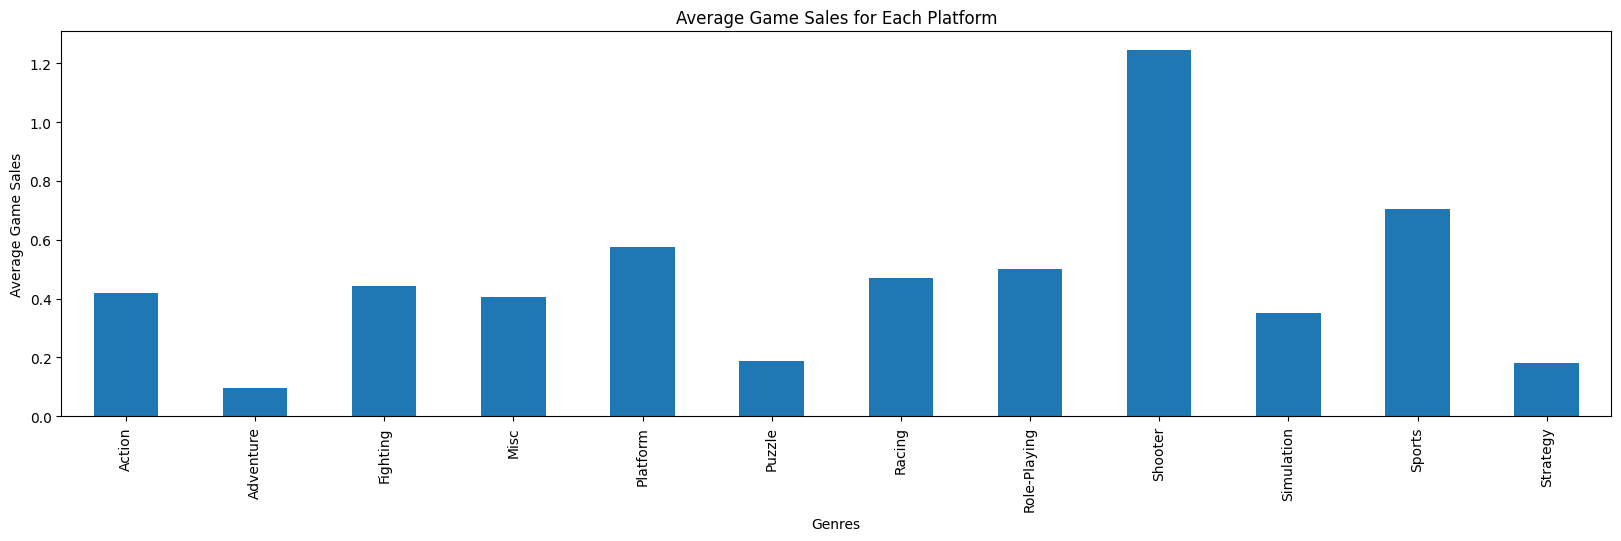

In [21]:
# Create a bar chart of average sales based on genre
fig, ax = plt.subplots(figsize=(20, 5))
df.groupby('genre')['total_sales'].mean().sort_index().plot(kind='bar', title='Average Game Sales for Each Platform', xlabel='Genres', ylabel='Average Game Sales', ax=ax)

<Figure size 640x480 with 0 Axes>

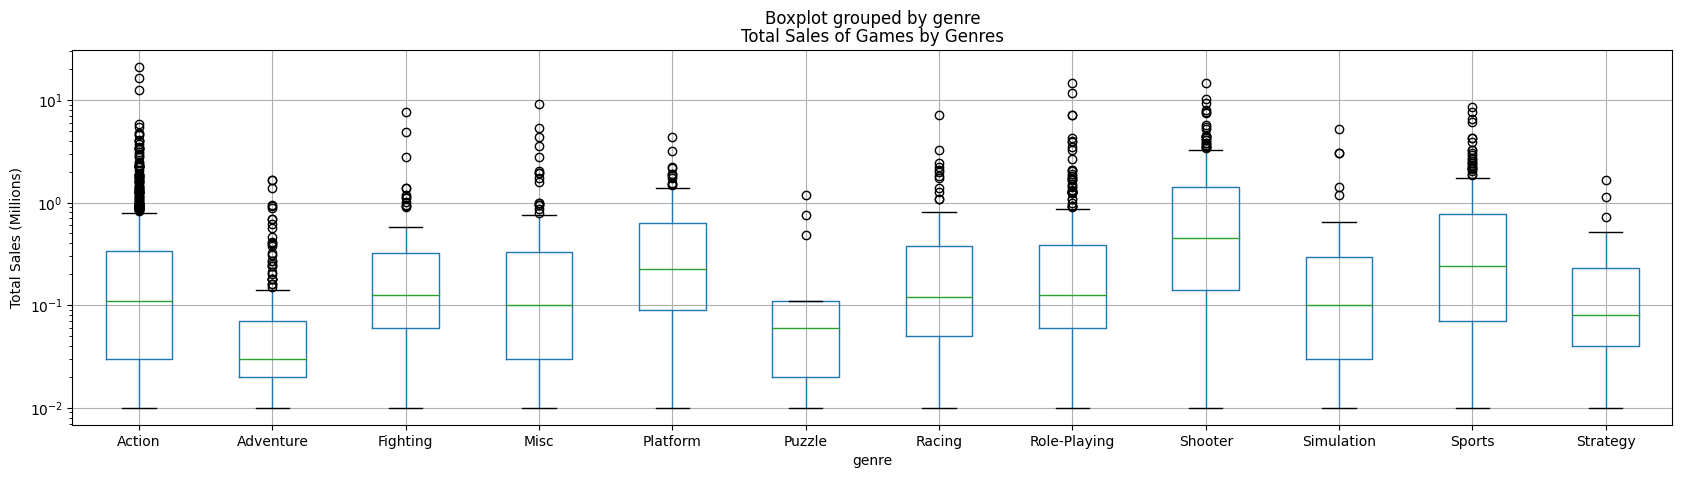

,mean,median,std,var
,total_sales,total_sales,total_sales,total_sales
genre,,,,
Action,0.420196,0.110,1.253909,1.572289
Adventure,0.096490,0.030,0.216445,0.046848
Fighting,0.441375,0.125,1.048883,1.100156
Misc,0.405290,0.100,1.007985,1.016033
Platform,0.576081,0.225,0.806808,0.650939
Puzzle,0.186471,0.060,0.325172,0.105737
Racing,0.469294,0.120,0.964101,0.929490
Role-Playing,0.499623,0.125,1.353164,1.831052


In [22]:
# Plot box plots for total sales broken down by genres
plt.figure()
df.boxplot(column='total_sales', by='genre', figsize=(20, 5))
plt.title('Total Sales of Games by Genres')
plt.xlabel('genre')
plt.ylabel('Total Sales (Millions)')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

# Calculate the mean, median, std dev and variance of the total sales by platform
df.pivot_table(index='genre', values=['total_sales'], aggfunc=['mean', 'median', 'std', 'var'])

We can see with the chart above that Shooter game genres take the lead in sales at that time, while Sports, Platform, Fighting and Action follow behind. Adventure looks to have the least, followed by Puzzle, Strategy and Simulation game genres. This can be useful information to add but need to take other data and information to come up with a better conclusion. It can give a general insight that the top selling genres have a broader apppeal to the general public. While Adventure, strategy and platform have more of a certain type of clientele.

Video Games and Regions
Identify the regions that have the top gaming platforms. Will utilize the sales to gauge the highest selling gaming platforms.

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64



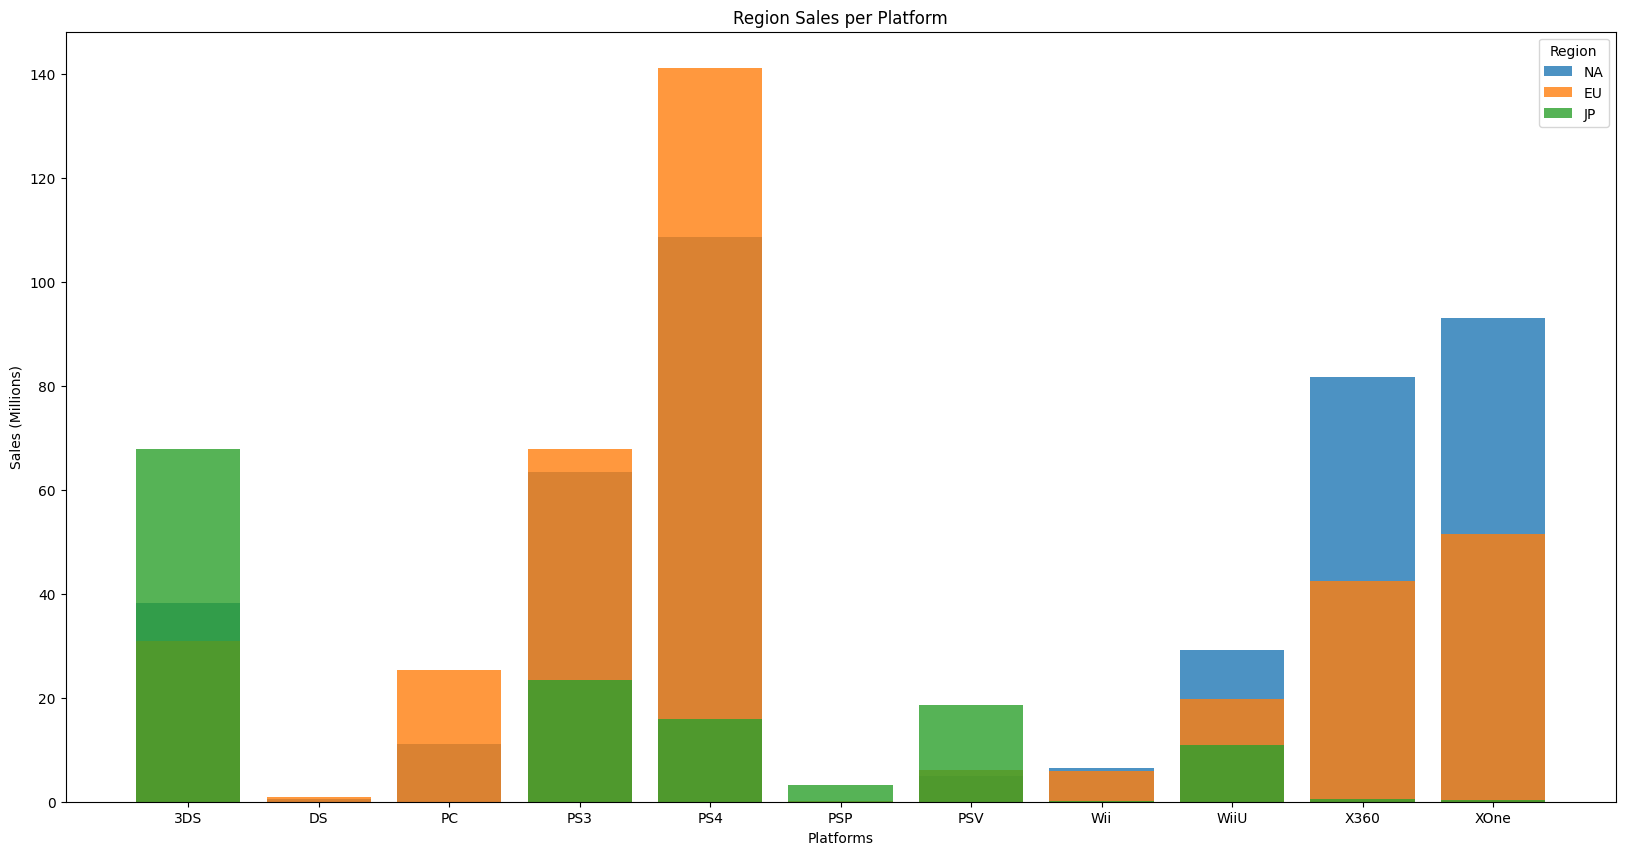

In [23]:
# Group by platform and sum sales for each region

# North America
top_5_plat_na = df.groupby('platform')['na_sales'].sum()
print(top_5_plat_na.sort_values(ascending=False).head())
print()

# Europe
top_5_plat_eu = df.groupby('platform')['eu_sales'].sum()
print(top_5_plat_eu.sort_values(ascending=False).head())
print()

# Japan
top_5_plat_jp = df.groupby('platform')['jp_sales'].sum()
print(top_5_plat_jp.sort_values(ascending=False).head())
print()

# Plot
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(top_5_plat_na.index, top_5_plat_na, label='NA', alpha=0.8)
plt.bar(top_5_plat_eu.index, top_5_plat_eu, label='EU', alpha=0.8)
plt.bar(top_5_plat_jp.index, top_5_plat_jp, label='JP', alpha=0.8)

plt.title('Region Sales per Platform')
plt.xlabel('Platforms')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.show()

Looking at the numbers and graph, the PS4 has the highest sales overall, as well as leads in Northa American and EU sales. In Japan it was the 3DS that lead the other platform which may point to a preference of handheld games there versus some of the major less portable platforms. Unortunatly in EU and North American markets the 3DS came up last.

Most Popular Gaame Genres by Region
We will investivate how the top five genres looked like in the North American, EU and Japan markets in sales. 

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64



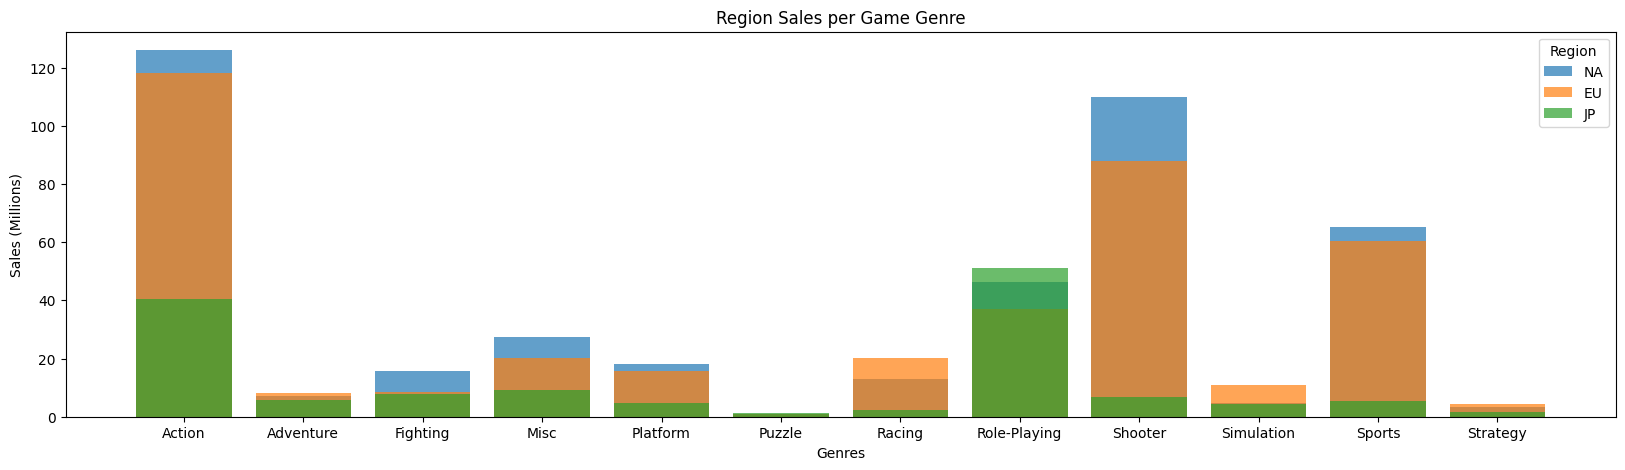

In [24]:
# Group by genre and sum sales for each region

# North America
na_genre_sales = df.groupby('genre')['na_sales'].sum()
print(na_genre_sales.sort_values(ascending=False).head())
print()

# Europe
eu_genre_sales = df.groupby('genre')['eu_sales'].sum()
print(eu_genre_sales.sort_values(ascending=False).head())
print()

# Japan
jp_genre_sales = df.groupby('genre')['jp_sales'].sum()
print(jp_genre_sales.sort_values(ascending=False).head())
print()

# Plot
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(na_genre_sales.index, na_genre_sales, label='NA', alpha=0.7)
plt.bar(eu_genre_sales.index, eu_genre_sales, label='EU', alpha=0.7)
plt.bar(jp_genre_sales.index, jp_genre_sales, label='JP', alpha=0.7)

plt.title('Region Sales per Game Genre')
plt.xlabel('Genres')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.show()

From the data and graph it seems like Action is the top selling genre in all three markets all together, being first in Noprth American and EU and falling only second in Japan. Shooter games are second in popularity in North American and EU but much less popular in Japan. Alternatively, role playing games are very first in sales in Japan and running a in the middle of the pack in North America and EU.


Compare Ratings vs Regional Sales
Will look at the top five ratings in each of the region and then we can use it to help hypothesize how ratings affect profit.

rating
M       165.21
U        89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

rating
M       145.32
E        83.36
U        78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

rating
U       85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64



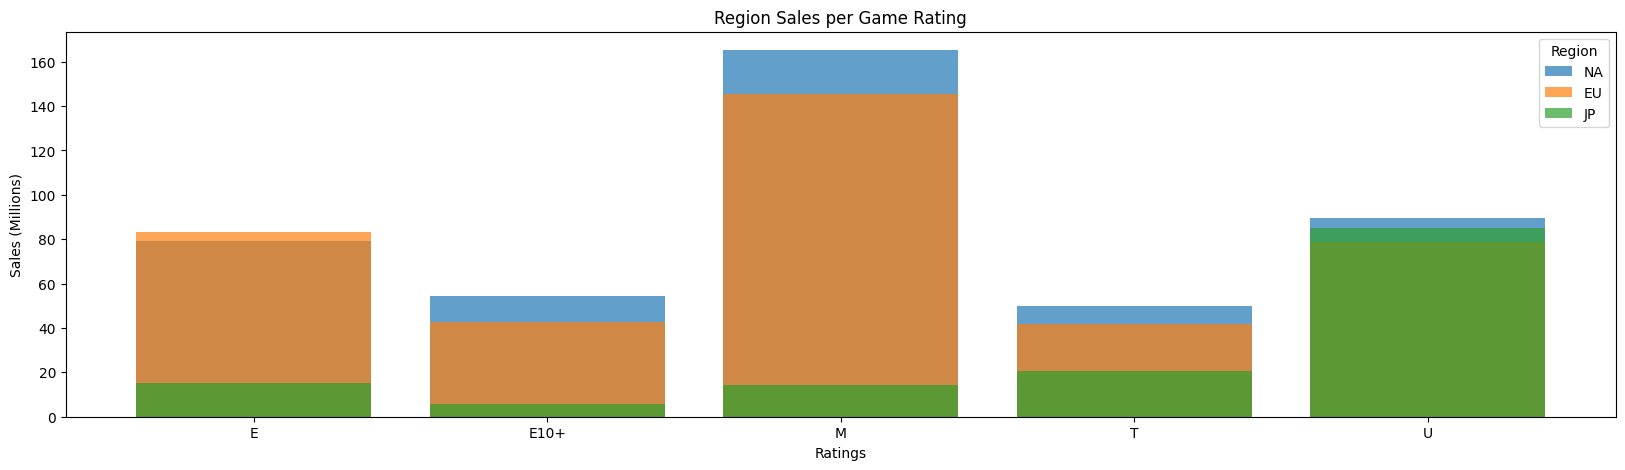

In [25]:
# Group by rating and sum sales for each region

# North America
na_rating_sales = df.groupby('rating')['na_sales'].sum()
print(na_rating_sales.sort_values(ascending=False).head())
print()

# Europe
eu_rating_sales = df.groupby('rating')['eu_sales'].sum()
print(eu_rating_sales.sort_values(ascending=False).head())
print()

# Japan
jp_rating_sales = df.groupby('rating')['jp_sales'].sum()
print(jp_rating_sales.sort_values(ascending=False).head())
print()

# Plot
fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(na_rating_sales.index, na_rating_sales, label='NA', alpha=0.7)
plt.bar(eu_rating_sales.index, eu_rating_sales, label='EU', alpha=0.7)
plt.bar(jp_rating_sales.index, jp_rating_sales, label='JP', alpha=0.7)

plt.title('Region Sales per Game Rating')
plt.xlabel('Ratings')
plt.ylabel('Sales (Millions)')
plt.legend(title='Region')
plt.show()

The data shows that the 'M' (Mature) games are more popular and sell more than the rest, which are followed by 'U' (Unknown) and 'E' (Everyone). It is worth pointing out that Japan has a lot of the 'U' rated games which may indicate games that are not officially rated are more of the norm in Japan. Japan appears to have a different rating system (Cero rating system) that may point to this irregularity of prominant 'U' rated games. Further data in their rating system may need to be investigated to help fill in the 'U' gaps with Japan.

Test Hypothesis
We will test the hypothesis from the average user ratings of the Xbox One and PC platforms are the same. We will do so using via independent samples t-test.

To set up the test we need to forumate a null and alternative hypothesis. For the comparison of average user ratings between the Xbox One and PC platforms, the null hypothesis (H0) states that the mean user ratings for both platforms are equal, while the alternative hypothesis (H1) suggests they are not equal.

To conduct the hypothesis test, I chose a significance level (alpha) of 0.1. This significance level was selected as it provides a balanced approach, allowing for a reasonable chance of detecting real differences without overly increasing the risk of making Type I errors, where we reject a true null hypothesis. For marketing purposes 0.1 for the alpha is satisfactory.

In [26]:
# Test the hypotheses
  
 #h0 = Average user ratings of the Xbox One and PC platforms are the same. 
 #h1 = Average user ratings of the Xbox One and PC platforms are NOT the same.
   
df[df['user_score'] != 0]
xbox_one_avg_rate = df[df['platform'] == 'XOne']['user_score'] 
pc_avg_rate = df[df['platform'] == 'PC']['user_score']

# Perform independent samples t-test
results = st.ttest_ind(xbox_one_avg_rate, pc_avg_rate)

print('p-value:', results.pvalue)
print()

# Check the p-value against alpha
alpha = 0.1

if results.pvalue < alpha:
    print("We reject the null hypothesis.")

else:
    print("We cannot reject the null hypothesis.")

p-value: 0.2487594853708977

We cannot reject the null hypothesis.


With a p-value of 0.24, which is greater than the chosen significance level of 0.1, we cannot reject the null hypothesis. This suggests that there is not a statistically significant difference in average user ratings between the Xbox One and PC platforms. Therefore, we can conclude that the average user ratings for these two platforms are the same.

Next I will test the hypothesis on adventure and strategy genres to see if there is a difference.
The null hypothesis (H0) indicate that the mean user ratings for both genres are the same, while the alternative hypothesis (H1) suggests they are different. The significance value (0.1) was chosen for the same reason stated in the previous test.

In [29]:
# Test the hypotheses
  
 #h0 = Average user ratings for the Action and Sports genres are the same.
 #h1 = Average user ratings for the Action and Sports genres are NOT the same.

df[df['user_score'] != 0]
act_avg_rate = df[df['genre'] == 'Action'] ['user_score']
sprt_avg_rate = df[df['genre'] == 'Sports']['user_score']

# Perform independent samples t-test
results = st.ttest_ind(act_avg_rate, sprt_avg_rate, nan_policy='omit')

print('p-value:', results.pvalue)
print()

# Check the p-value against alpha
alpha = 0.10

if results.pvalue < alpha:
    print("We reject the null hypothesis.")

else:
    print("We cannot reject the null hypothesis.")

p-value: 0.09074207113403288

We reject the null hypothesis.


The p-value came up with 0.09, which in less than the 0.1 for alpha setting, which leads to rejecting the null hypothesis. We can conclude that there is a statistically significant difference in average user ratings between the Action and Sports genres. We can then accept the alternative hypothesis that the average user ratings for these two genres are not the same.

Conclusion

There are several key conclusions that we can take away from our thorough data analaysis of the gaming industry during the period of 1980-2016. In particular during the 1990's and mid 2010 we see a huge surge in game releases with the years 2008 and 2009 being at the peak. During the years we see that some older consoles like the PS2 had a long period of releases that may be a indicator at the time that it was extremely popular and those who purchased a PS2 may have been satisfied for a long period of time from what the data shows for other platforms. By narrowing the focus at 2006 and on allowed a more narrow perspective that showed high sales and the transition period of gaming consoles.Analyzing and comparing game sales of the gaming platforms pointed to Fifa 14 and Lego Marvel Super Heroes having high sales on the PS3, PS4 and XBox 360. Game genres  showed that shooter games were the highest, with sports and platforms following behind. Looking at the geographical similarities and differences provided some insight on changes in preferences as a whole. North America and Europe showed they preferred action games, while Japan seemed to prefer role-playing.Game ratings showed 'M' (Mature rating) to be popular in North America and Europe markets, with 'E' (Everyone rating) followed behind. Hypothesis testing further affirmed and unaffrimed distinctions, with no statistically significant differences observed in average user ratings in regard to platforms, but rather with genres. In conclusion, the findings help provide a comprehensiive understanding of the gaming landscape and can help provide stakeholders perspective on gaming trends in North America, Europe and Japan, which can help make marketing decisions in the gaming industry.